In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data

In [92]:
df = pd.read_csv("heart.csv")

In [93]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Classification Yes/No -> Change target: 0 vs 1

In [94]:
df["target"] = df.target.map({0:0, 1:1, 2:1, 3:1, 4:1})

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [96]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Distribution of the age and target

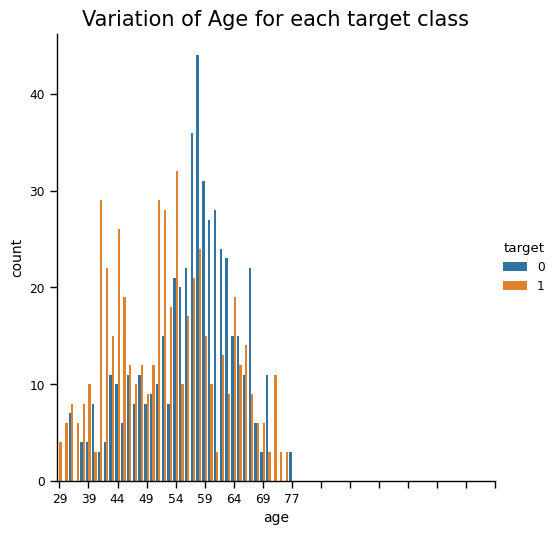

In [97]:
sns.set_context(context = "paper", font_scale=1, rc={
    'font.size': 3,
    'axes.titlesize': 15,
    'axes.labelsize': 10,
})
ax = sns.catplot(kind='count', data= df, x = 'age', hue = 'target', order=df['age'].sort_values().unique())
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title("Variation of Age for each target class")
plt.show()

## Distribution of age and sex with the target class

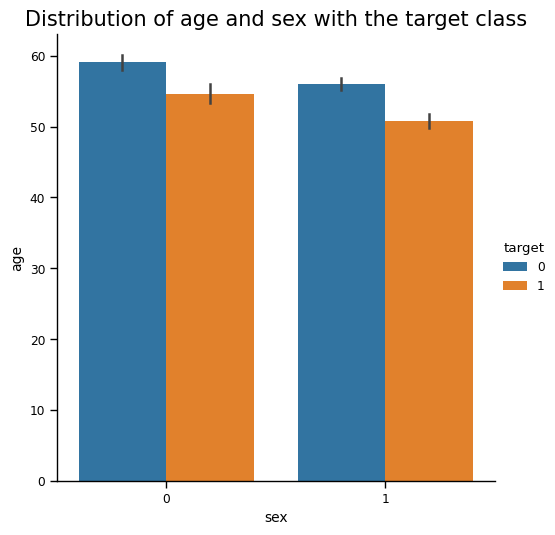

In [98]:
sns.catplot(kind='bar', data= df, x = 'sex', y = 'age', hue='target')
plt.title("Distribution of age and sex with the target class")
plt.show()

# 2. Exploration Data Analysis (EDA)

### Target variable: Target

In [99]:
df.target.value_counts(normalize=True).to_frame()

,proportion
target,
1,0.513171
0,0.486829


#### => Balanced Data 

### Feature variable: Age

In [100]:
# df['age'].value_counts(normalize=True).to_frame()

# 3. Model selection

## 3.1 - Preprocessing the data

In [101]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


## 3.2 - KNN


In [102]:
from sklearn.neighbors import KNeighborsClassifier
#define the model
classifier = KNeighborsClassifier(n_neighbors =5,
                                  weights='uniform',
                                  algorithm='auto',
                                  leaf_size=30,
                                  p=2,
                                  metric='minkowski')
classifier.fit(X_train, Y_train)

#Predicting the test set data
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, Y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(Y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for testing set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.92
Accuracy for testing set for KNeighborsClassifier = 0.73


## 3.3 - Gaussian Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)


#Predicting the test set data
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, Y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(Y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for testing set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.84
Accuracy for testing set for KNeighborsClassifier = 0.8


## 3.4 - Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=10,
                                    min_samples_split=2,
                                    random_state=42)

classifier.fit(X_train, Y_train)


#Predicting the test set data
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, Y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(Y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for testing set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 1.0
Accuracy for testing set for KNeighborsClassifier = 0.99


## 3.5 - Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion="gini",
                                    max_depth=10,
                                    min_samples_split=2, 
                                    n_estimators=100,
                                    random_state=42)
classifier.fit(X_train, Y_train)


#Predicting the test set data
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, Y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(Y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for testing set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 1.0
Accuracy for testing set for KNeighborsClassifier = 0.99


## 3.6 - AdaBoost

In [106]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,
                                learning_rate=1,
                                random_state=42)
classifier.fit(X_train, Y_train)
#Predicting the test set data
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, Y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(Y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for testing set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.95
Accuracy for testing set for KNeighborsClassifier = 0.88


## 3.7 - Gradient Boosting

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(learning_rate=0.1,
                                        n_estimators=100,
                                        subsample=1,
                                        min_samples_split=2,
                                        max_depth=3,
                                        random_state=42)

classifier.fit(X_train, Y_train)
#Predicting the test set data
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, Y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(Y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for testing set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.98
Accuracy for testing set for KNeighborsClassifier = 0.93


## 3.8 - XGBoost

In [108]:
from xgboost import XGBClassifier
classifier = XGBClassifier(objective = "binary:logistic",
                           random_state = 42,
                           n_estimators = 100)
classifier.fit(X_train, Y_train)
#Predicting the test set data
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, Y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(Y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for testing set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 1.0
Accuracy for testing set for KNeighborsClassifier = 0.99


## 3.9 - SVM

In [109]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',
                 random_state=42)
classifier.fit(X_train, Y_train)
#Predicting the test set data
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, Y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(Y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for testing set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.72
Accuracy for testing set for KNeighborsClassifier = 0.68


## 3.10 - Stacking-Based Methods

In [111]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

clf = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('xgb', xgb),
    ('gc', gc),
    ('svc', svc),
]
from sklearn.ensemble import StackingClassifier
xg = XGBClassifier()
classifier = StackingClassifier(estimators=clf, final_estimator=xg)
classifier.fit(X_train, Y_train)
#Predicting the test set data
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, Y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(Y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for testing set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 1.0
Accuracy for testing set for KNeighborsClassifier = 0.99
